# 2. Model

Nachdem im ersten Teil die Daten genauer betrachtet und bereinigt wurden widmet sich der Teil "2. Model" der Erstellung eines Kerasmodells zur Vorhersage von Verkaufspreisen für Gebrauchtwagen in den USA. Die Prognose basiert auf den 2015 erhobenen Daten "Used Car Auction Prices".

# 2.1 Import Data & Packages

Zu Beginn des Teils "Model" werden die benötigten Python-Bibliotheken importiert. Anschließend werden die im ersten Teil bereinigten Daten, welche als CSV-Datei vorliegen importiert. Besonders relevant ist die Bibliothek Tensorflow, da das folgende ML-Modell mit Keras erstellt wird.

In [21]:
# Import von Python-Bibliotheken

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers

tf.__version__ # Ausgabe der Tensorflow Version

'2.8.0'

Nun lesen wir die aus Punkt 1. bereinigten Daten ein, welche als CSV-Datei vorliegen.

In [22]:
# Einlesen des Dataframes
df = pd.read_csv("/Users/lukas/Desktop/car_price_final.csv")

# 2.2 Data



## Overview

Um den aktuellen Stand des Datensatzes zu prüfen nutzen wir innerhalb des Unterpunkts "Overview" die Methoden "head" und "info".

In [23]:
df.head() 

,year,brand,model,trim,type,transmission,state,condition,odometer,color,interior,seller,price,date
0,2015,kia,sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 series,328i SULEV,sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,s60,T5,sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472336 entries, 0 to 472335
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   brand         472336 non-null  object 
 2   model         472336 non-null  object 
 3   trim          472336 non-null  object 
 4   type          472336 non-null  object 
 5   transmission  472336 non-null  object 
 6   state         472336 non-null  object 
 7   condition     472336 non-null  float64
 8   odometer      472336 non-null  float64
 9   color         472336 non-null  object 
 10  interior      472336 non-null  object 
 11  seller        472336 non-null  object 
 12  price         472336 non-null  int64  
 13  date          472336 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 50.5+ MB


## Label definition

Nun definieren wir die Outcome-Variable "y_label" mit "price", da der Preis der Gebrauchtwagen im Folgenden Modell prognostiziert werden soll.

In [25]:
y_label = "price"

## Data format

Aufgrund der Einschränkungen durch lokale Rechner-Kapazitäten werden die Datentypen int64 zu int32 und float64 zu float32 transformiert. Außerdem werden die Variablen "year" und "condition" als Datentyp category  und folgende Variablen zu einem string konvertiert "brand","model","trim","type","transmission","state","color","interior","seller".

In [26]:
# Änderung der Datentypen Integer und Float
int_32 = dict.fromkeys(df.select_dtypes(np.int64).columns, np.int32) # Erstellung Dictionary mit int64 als Schlüssel und np.int32 als Wert
df = df.astype(int_32) # Änderung des Datentyps zu "int32" mithilfe des Dictionary int_32

float_32 = dict.fromkeys(df.select_dtypes(np.float64).columns, np.float32) # Erstellung Dictionary mit float64 als Schlüssel und np.float32 als Wert
df = df.astype(float_32) # Änderung des Datentyps zu "float32" mithilfe des Dictionary float_32

In [27]:
# Änderung des Datentyps zu "category"
df["year"] = df["year"].astype("category") # Veränderung des Datentyps zu category
df["condition"] = df["condition"].astype("category") # Veränderung des Datentyps zu category

In [28]:
# Änderung des Datentyps zu "string"
string_convert = ["brand","model","trim","type","transmission","state","color","interior","seller"] # Erstellen einer Liste mit Variablen, welche zum "string" transformiert werden sollen

# For-Schleife, um durch die Liste (string_convert) zu iterieren
for i in string_convert:
    df[i] = df[i].astype("string")

In [29]:
df.info() # Prüfen der Datentypen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472336 entries, 0 to 472335
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   year          472336 non-null  category
 1   brand         472336 non-null  string  
 2   model         472336 non-null  string  
 3   trim          472336 non-null  string  
 4   type          472336 non-null  string  
 5   transmission  472336 non-null  string  
 6   state         472336 non-null  string  
 7   condition     472336 non-null  category
 8   odometer      472336 non-null  float32 
 9   color         472336 non-null  string  
 10  interior      472336 non-null  string  
 11  seller        472336 non-null  string  
 12  price         472336 non-null  int32   
 13  date          472336 non-null  object  
dtypes: category(2), float32(1), int32(1), object(1), string(9)
memory usage: 40.5+ MB


Anschließend werden drei Listen (list_num, list_cat_int, list_cat_string) mit den jeweiligen Variablennamen erstellt. <br>
<br>
list_num = 'odometer' <br>
list_cat_int = 'year', 'condition' <br>
list_cat_string = 'brand', 'model', 'trim', 'type', 'transmission', 'state', 'color', 'interior', 'seller'

In [30]:
# Erstellung von Listen für alle nummerischen Werte, alle kategorialen Daten und alle "string"-Daten
list_num = df.drop(columns=[y_label]).select_dtypes(include=[np.number]).columns.tolist()
list_cat_int = df.drop(columns=[y_label]).select_dtypes(include=["category"]).columns.tolist()
list_cat_string = df.drop(columns=[y_label]).select_dtypes(include=["string"]).columns.tolist()

## Data Splitting

Im Punkt ""Data Splitting" werden die Daten in Trainings und Validation Datensets aufgeteilt.

In [31]:
# Data Splitting
df_val = df.sample(frac=0.2, random_state=1337)
df_train = df.drop(df_val.index)

In [32]:
print("Using %d for training and %d for validation"
    % (len(df_train), len(df_val))
)

Using 377869 for training and 94467 for validation


## Transform to Tensors

Nun wird ein "tf.data.Dataset" erstellt für die Trainings- und Validierungsdaten.
Hierfür wird eine Funktion erstellt, welche die Datensets zu "tf.data.Dataset" konvertiert und anschließend mischt und batched.

In [33]:
# Transform to Tensors

def dataframe_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df.pop(y_label)
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=5000)
    ds = ds.batch(batch_size)
    df = ds.prefetch(batch_size)
    return ds

Anschließend wird die Funktion "dataframe_to_dataset" für die jeweiligen Trainings- und Validierungsdaten angewandt.

In [34]:
batch_size =  32 # Definition der Batchsize

ds_train = dataframe_to_dataset(df_train, shuffle=True, batch_size=batch_size)
ds_val = dataframe_to_dataset(df_val, shuffle=True,batch_size=batch_size)

2022-07-04 17:15:00.522313: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/tf_new/lib/python3.8/site-packages/tensorflow/python/data/util/structure.py:485: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  raise TypeError("Could not build a `TypeSpec` for {} with type {}".format(
/opt/anaconda3/envs/tf_new/lib/python3.8/site-packages/tensorflow/python/data/util/structure.py:485: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  raise TypeError("Could not build a `TypeSpec` for {} with type {}".format(


# Feature preprocessing

Im nächsten Schritt wird mit Keras preprocessing layer eine neue Funktionen erstellt, welche für nummerische Feature eine Normalisierung durchführt.

In [35]:
# Definition des Numerical-preprocessing
def get_normalization_layer(name, dataset):
    normalizer =  layers.Normalization(axis=None) # Erstellen des Normalization-Layers

    feature_ds = dataset.map(lambda x, y: x[name]) 

    normalizer.adapt(feature_ds) 

    return normalizer

Zudem wird eine Funktion definiert, welche multi-hot-encoding unt der Verwendung von tf.keras.layers.StringLookup, tf.keras.layers.IntegerLookup, und tf.keras.CategoryEncoding (preprocessing layers) durchführt. 

In [36]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  
  if dtype == 'string': 
    index = layers.StringLookup(max_tokens=max_tokens)
  
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  feature_ds = dataset.map(lambda x, y: x[name]) 

  index.adapt(feature_ds)

  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size()) 

  return lambda feature: encoder(index(feature))

## Data preprocessing
Innerhalb des Data preprocessing wenden wir die in "Feature preprocessing" definierten Funktionen auf die nummerischen und kategorialen Daten an. Die Features werden zudem zur Liste "all_inputs" hinzugefügt. <br> <br>
Wir beginnen mit der Definition der Listen, welche innerhalb der darauffolgenden for-Schleifen benötigt werden.

In [37]:
all_inputs = []
encoded_features = []

### Numerical preprocessing

Für jedes Feature in list_num("odometer") wird ein tf.keras.input erstellt. Anschließend wird das Feature normalisiert und der Featurename der Liste all_inputs und das Encoded-Feature der Liste encoded_features hinzugefügt.

In [38]:
# Numerical features
for feature in list_num:
  numeric_feature = tf.keras.Input(shape=(1,), name=feature)
  normalization_layer = get_normalization_layer(feature, ds_train)
  encoded_numeric_feature = normalization_layer(numeric_feature)
  all_inputs.append(numeric_feature)
  encoded_features.append(encoded_numeric_feature)

### Categorial preprocessing

Umwandlung der kategorischen Integer zu Integer Indices und Anwendung von multi-hot-encoding. Anschließend wird das Feature an die Liste encoded_feature angehängt.

In [39]:
for feature in list_cat_int:
  categorical_feature = tf.keras.Input(shape=(1,), name=feature, dtype='int32')
  encoding_layer = get_category_encoding_layer(name=feature,
                                               dataset=ds_train,
                                               dtype='int32',
                                               max_tokens=5)
  encoded_categorical_feature = encoding_layer(categorical_feature)
  all_inputs.append(categorical_feature)
  encoded_features.append(encoded_categorical_feature)

In [40]:
for feature in list_cat_string:
  categorical_feature = tf.keras.Input(shape=(1,), name=feature, dtype='string')
  encoding_layer = get_category_encoding_layer(name=feature,
                                               dataset=ds_train,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_feature = encoding_layer(categorical_feature)
  all_inputs.append(categorical_feature)
  encoded_features.append(encoded_categorical_feature)

# 2.3 Model

Anschließend wird das Modell mit Keras erstellt.

In [41]:
# Modell erstellen

# Input
all_features = layers.concatenate(encoded_features)

# Erster layer
x = layers.Dense(32, activation="relu")(all_features)

# Dropout zur Verhinderung von Overfitting
x = layers.Dropout(0.5)(x)

# Output layer
output = layers.Dense(1)(x)

# Gruppierung aller layer
model = tf.keras.Model(all_inputs, output)

In [42]:
# Anpassung der Konfigurationen des Modells
model.compile(optimizer="adam", 
              loss ="mae", 
              metrics=["mean_squared_error"])

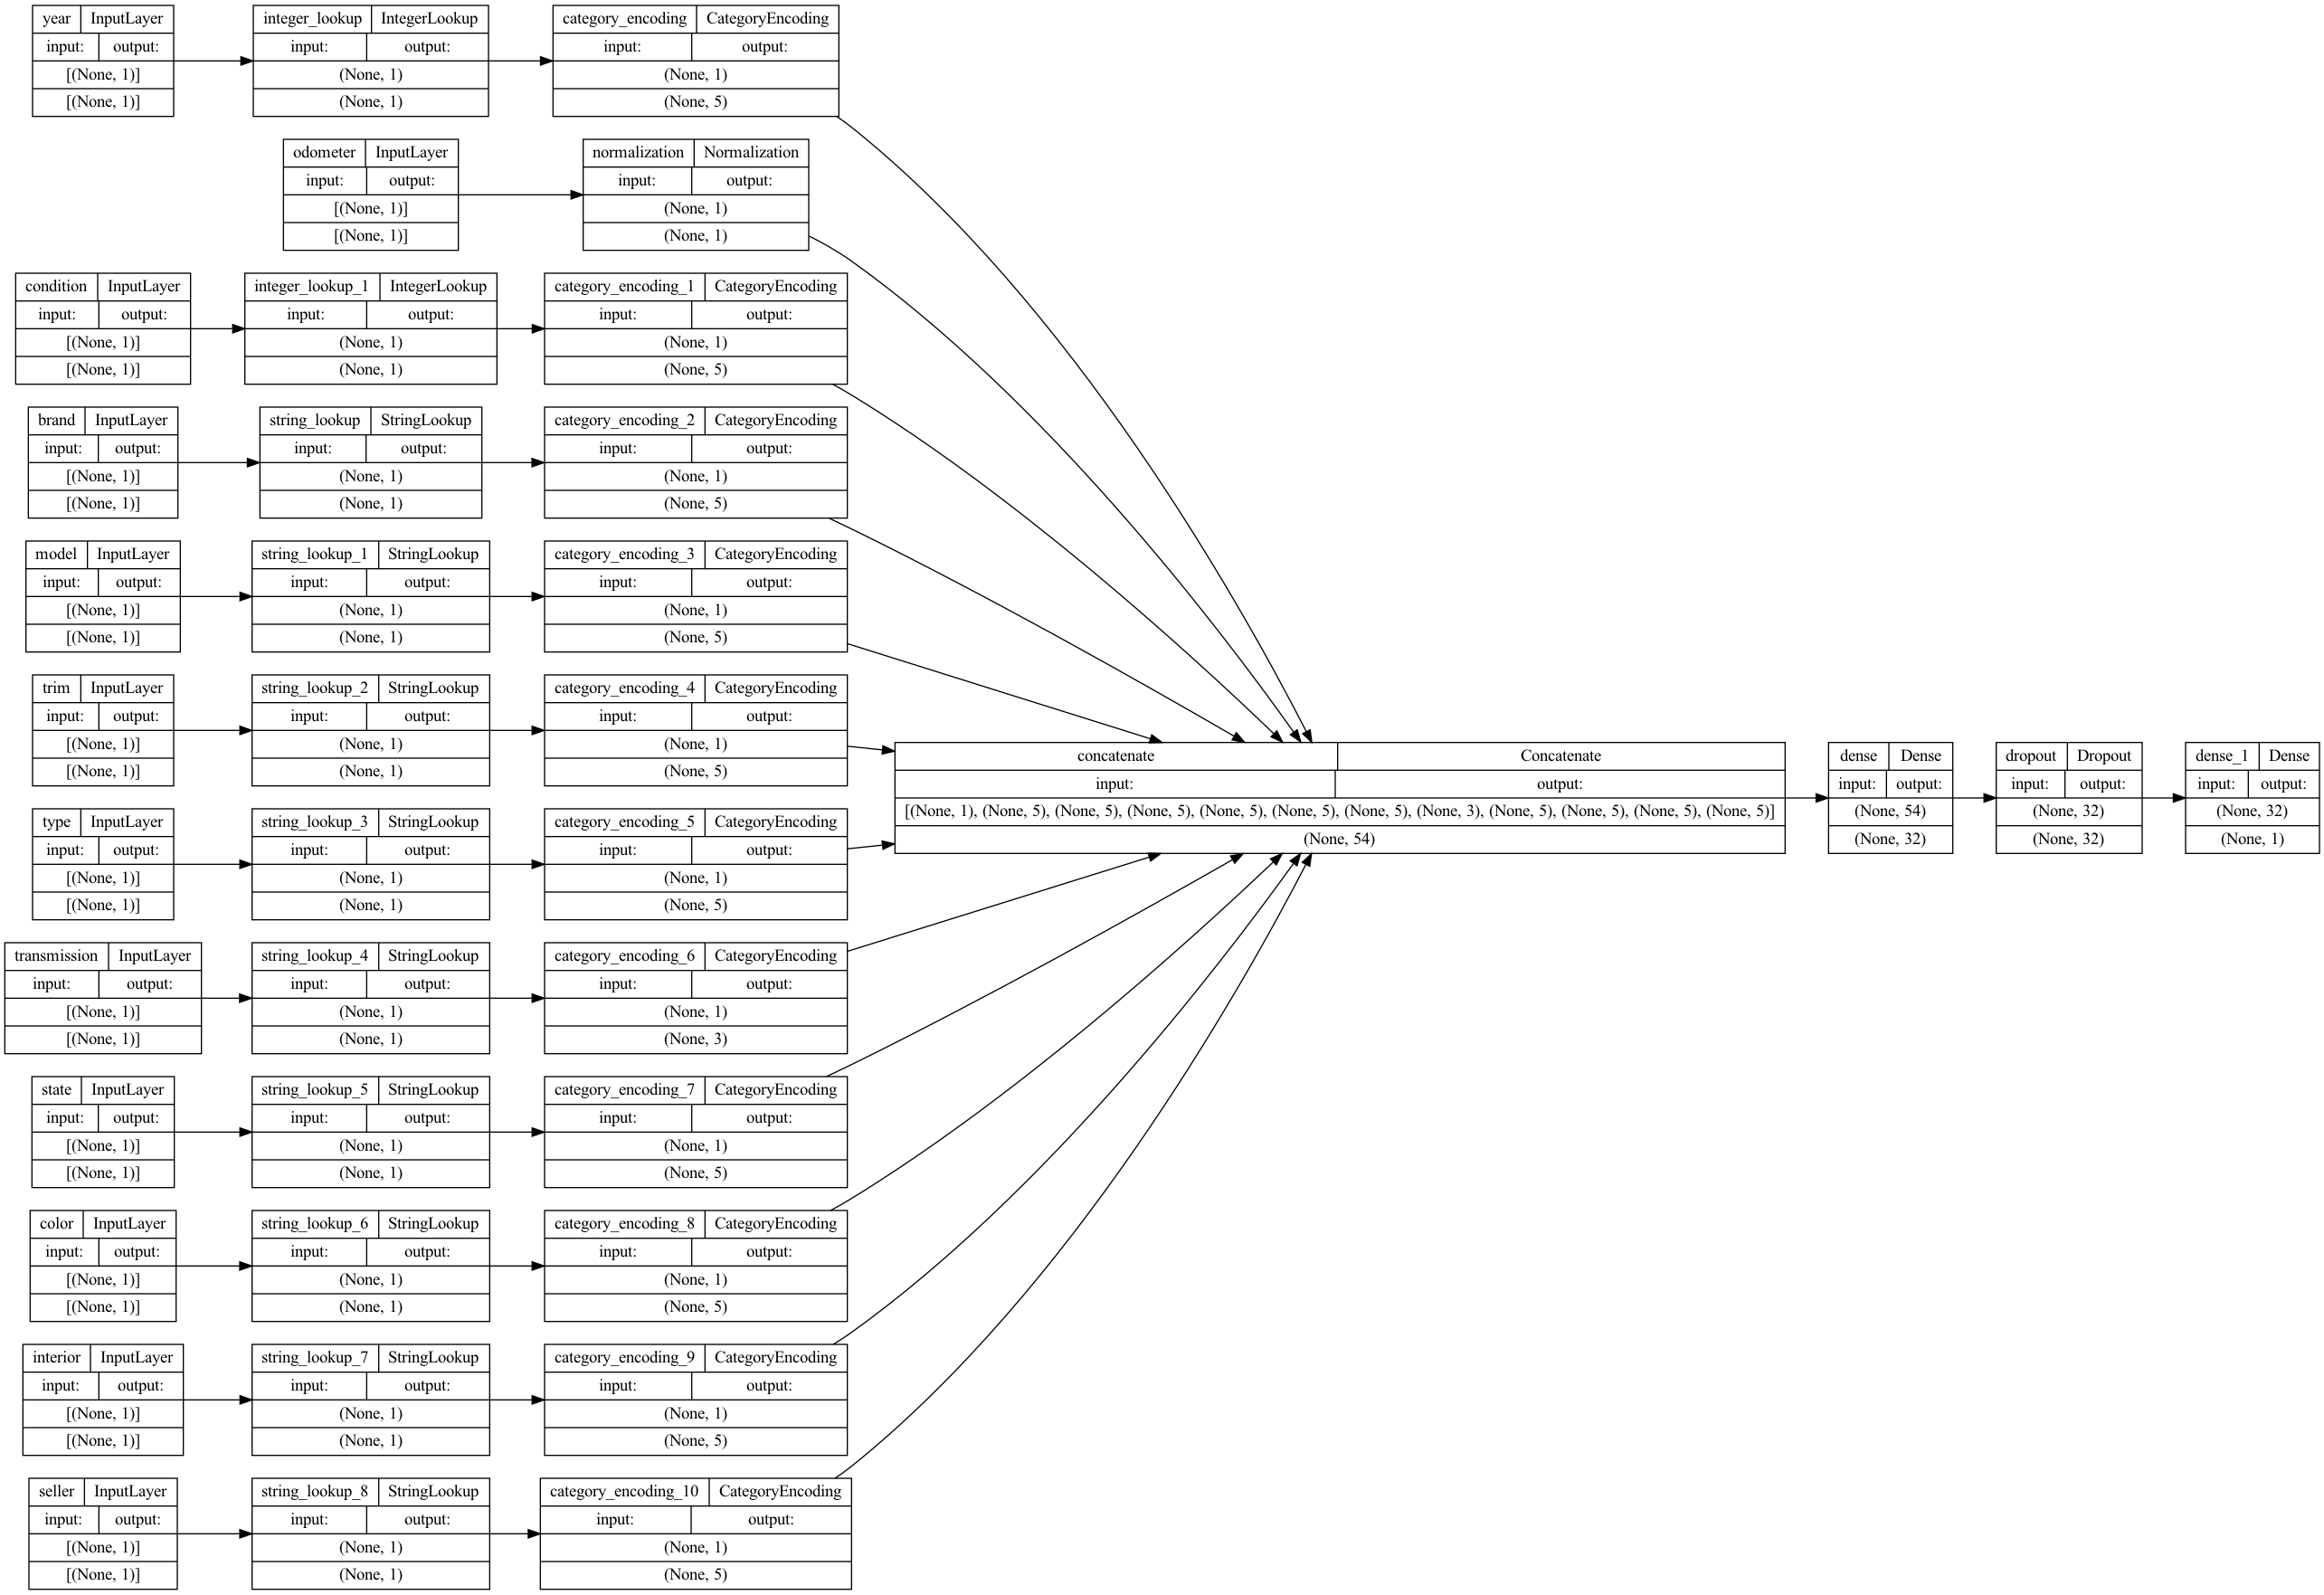

In [54]:
# `rankdir='LR'` is to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [45]:
# Callback hinzufügen, um Overfitting zu verhindern
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
]

## Training

Nun wird das Modell trainiert und getestet.

In [46]:
%%time
model.fit(ds_train, epochs=6, validation_data=ds_val, callbacks=callbacks)

Epoch 1/6


/opt/anaconda3/envs/tf_new/lib/python3.8/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['date'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


11809/11809 [==============================] - 32s 3ms/step - loss: 8011.5396 - mean_squared_error: 131315984.0000 - val_loss: 4906.8149 - val_mean_squared_error: 60274216.0000
Epoch 2/6
11809/11809 [==============================] - 31s 3ms/step - loss: 4974.9316 - mean_squared_error: 61932460.0000 - val_loss: 4160.0635 - val_mean_squared_error: 46571072.0000
Epoch 3/6
11809/11809 [==============================] - 32s 3ms/step - loss: 4730.9170 - mean_squared_error: 56377784.0000 - val_loss: 4036.1543 - val_mean_squared_error: 44159712.0000
Epoch 4/6
11809/11809 [==============================] - 30s 3ms/step - loss: 4663.2773 - mean_squared_error: 54955728.0000 - val_loss: 3966.5820 - val_mean_squared_error: 42878924.0000
Epoch 5/6
11809/11809 [==============================] - 29s 2ms/step - loss: 4617.1621 - mean_squared_error: 53810608.0000 - val_loss: 3922.5034 - val_mean_squared_error: 41963552.0000
Epoch 6/6
11809/11809 [==============================] - 30s 3ms/step - loss: 4

In [47]:
loss, mean_squared_error = model.evaluate(ds_val)

print("MSE", mean_squared_error)

2953/2953 [==============================] - 6s 2ms/step - loss: 3895.7888 - mean_squared_error: 41521780.0000
MSE 41521780.0


# 2.4 Perform inference

Zuerst wird das Modell gespeichert.

In [48]:
model.save('keras_cars') # Modell speichern

2022-07-04 17:20:25.473373: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: keras_cars/assets


Anschließend wird das gespeicherte Modell zum Test geladen.

In [49]:
reloaded_model = tf.keras.models.load_model('keras_cars') # lade das gespeicherte Modell

Nun wird ein Sample erstellt, um eine Testprognose für ein Beispielauto zu erstellen.

In [50]:
sample = {
    "year": 2014,
    "brand": "bmw",
    "model": "sorento",
    "trim": "LX",
    "type": "SUV",
    "transmission": "automatic",
    "state": "ca",
    "condition": 2.0,
    "odometer": 9393.0,
    "color": "white",
    "interior": "black",
    "seller": "kia motors america, inc",
}

Anschließend bereiten wir den Input für das Modell vor mithilfe der Funktion convert_to_tensor.

In [51]:
input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()} #Definiere Input & transformiere sample zu Tensoren

Anschließend führen wir eine Vorhersage für das Beispielset aus.

In [52]:
predictions = reloaded_model.predict(input_dict) # Erstelle Vorhersage

In [53]:
print(
    "Der Preis für das Auto beträgt %.1f USD "
    "lauft der Vorhersage des Keras-Modells" % (predictions[0][0],)
)

Der Preis für das Auto beträgt 18749.5 USD lauft der Vorhersage des Keras-Modells
